In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("song_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [4]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [5]:
data = data.to_numpy()

In [6]:
import sys
sys.path.append("/home/fyang/code/ml/ml-starter")
from models.liner_regression import Liner
song_names = data[:, 0]
song_labels = data[:, 1].reshape(len(data), 1).astype('float64')
song_data = data[:, 1:]
from utils.preprocess import std
from utils.preprocess import split_train_test
# song_data = std(song_data)
train_data, train_label, test_data, test_label = split_train_test(song_data, song_labels)
train_data = std(train_data)
test_data = std(test_data)
test_data = test_data[:-10, :]
test_label = test_label

liner = Liner(eta=1e-3, epochs=100, batch_size=30)
liner.fit(train_data, train_label, test_data, test_label)



epoch[0] train loss: 533.402732, test loss: 538.919947
epoch[1] train loss: 274.044304, test loss: 278.026603
epoch[2] train loss: 205.431742, test loss: 208.635299
epoch[3] train loss: 179.962397, test loss: 182.739749
epoch[4] train loss: 164.738116, test loss: 167.254168
epoch[5] train loss: 152.481418, test loss: 154.811469
epoch[6] train loss: 141.557032, test loss: 143.739038
epoch[7] train loss: 131.535311, test loss: 133.593382
epoch[8] train loss: 122.257313, test loss: 124.200041
epoch[9] train loss: 113.657180, test loss: 115.488353
epoch[10] train loss: 105.683287, test loss: 107.410374
epoch[11] train loss: 98.289021, test loss: 99.914364
epoch[12] train loss: 91.430671, test loss: 92.959936
epoch[13] train loss: 85.061907, test loss: 86.499869
epoch[14] train loss: 79.150047, test loss: 80.502722
epoch[15] train loss: 73.663700, test loss: 74.934632
epoch[16] train loss: 68.567817, test loss: 69.762582
epoch[17] train loss: 63.833757, test loss: 64.957386
epoch[18] train 

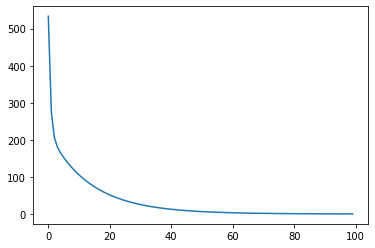

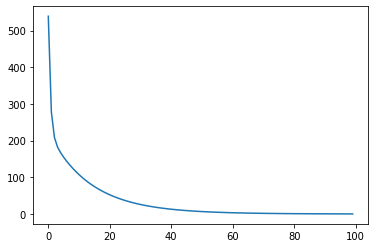

In [7]:
from matplotlib import pyplot as plt

plt.plot(liner.losses)
plt.show()
plt.plot(liner.losses_t)

In [8]:
valid = test_data[:3, :]
liner.predict(np.c_[np.ones(len(valid)), valid]), test_label[:3]

(array([[57.749929182157864],
        [58.07919375802728],
        [88.81217803255791]], dtype=object),
 array([[57.],
        [58.],
        [90.]]))

In [9]:
liner.W

array([[52.97039267083664, 96.51692218448704, -1.727755838681246,
        -0.5588266752182157, 1.393680313205921, -1.4927208729190724,
        -1.2329129432989399, -0.039456883436021946, -1.0393637347797473,
        2.252092866895796, 0.054992927052711825, -0.15542100155860833,
        -0.32901527539665454, 0.8544526578758808, -0.9307870228819147]],
      dtype=object)